# Similarity-Based Constraint Score For Feature Selection Notebook

In this notebook, you will find a comprehensive summary of the project, detailing key steps undertaken and presenting results obtained during the implementation of This innovative constraint score.



In [1]:
%cd /Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS
import numpy as np
import pandas as pd
import sklearn.datasets as skd
from sklearn.preprocessing import StandardScaler
from c_scores import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as Knn
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# warnings.filterwarnings("default")

/Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS


# Overview of scores used
## Supervised Scores 
### Constraint Score 1
$
SC_{r}^1 = \frac{\sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{M}}}{\sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{C}}} = \frac{f_{r}^T L^{\mathcal{M}} f_{r}^T}{f_{r}^T L^{\mathcal{C}} f_{r}^T} 
$

### Constraint Score 2
$
SC_{r}^2 = \sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{M}} - \lambda \sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{C}} = f_{r}^T L^{\mathcal{M}} f_{r}^T - \lambda {f_{r}^T L^{\mathcal{C}} f_{r}^T} 
$

### Supervised Similarity Based Constraint Score
$\ldots$
## Semi-Supervised Scores 

### Constraint Score 3 

$
SC_{r}^3 = \frac{\sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{KNN1}}}{\sum_{i=1}^n \sum_{j=1}^n (x_{ir} - x_{jr})^2 w_{ij}^{\mathcal{C}}} = \frac{f_{r}^T L^{\mathcal{KNN1}} f_{r}^T}{f_{r}^T L^{\mathcal{C}} f_{r}^T} 
$

### Constraint Score 4 
 $ SC^4_r = \frac{f_r^{T}Lf_r}{f_r^{T}Df_r} \cdot \frac{{f_r}^{T}L^{\mathcal{M}}f_r}{{f_r}^{T}L^{\mathcal{C}}f_r} $
### Semi-Supervised Similarity Based Constraint Score 

$ \ldots $



## RESULTS

### Wine dataset

In [2]:
# Loding the wine data
WineDB = skd.load_wine()
X = WineDB.data
y = WineDB.target

X_wine = np.concatenate((X, y.reshape(-1, 1)), axis=1)
X_train_wine , X_test_wine = split_dataset(X_wine)

Rep number:   0%|          | 0/10 [00:00<?, ?it/s]

Rep number: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


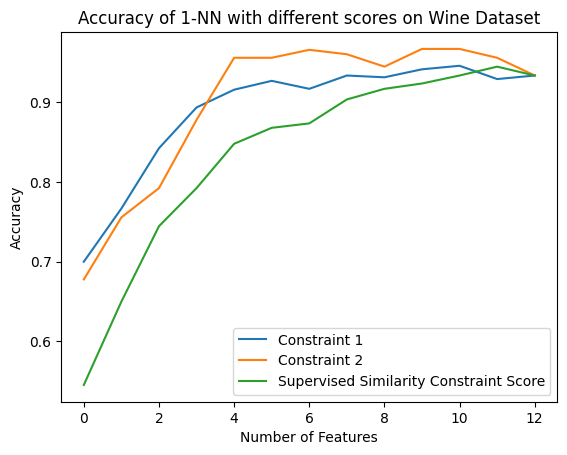

In [3]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_wine, X_test_wine,10,10)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]



plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Wine Dataset')

plt.legend()


In [6]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)

AUC of Constraint 1:  0.8275213675213676
AUC of Constraint 2:  0.8385470085470086
AUC of Similarity Constraint Score:  0.7797008547008546


Rep number: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


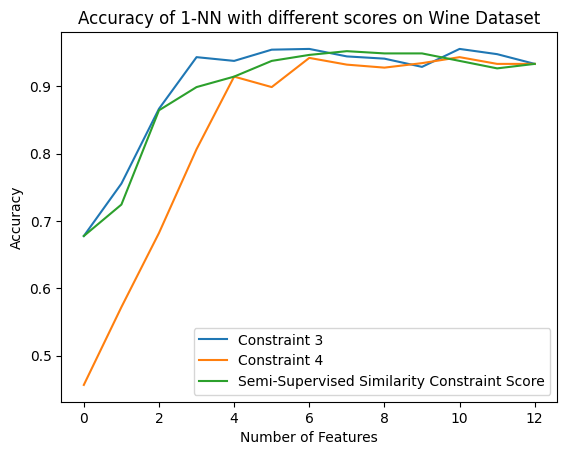

In [4]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_wine, X_test_wine,10,10)
accuracy_semi_supervised_similarity_constraint = scores_accuracy[0]
accuracy_constraint_3 = scores_accuracy[1]
accuracy_constraint_4 = scores_accuracy[2]



plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Wine Dataset')

plt.legend()


In [5]:
AUC_constraint_3 = auc_score(accuracy_constraint_3)
AUC_constraint_4 = auc_score(accuracy_constraint_4)
AUC_semi_supervised_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)

print('AUC of Constraint 3: ', AUC_constraint_3)
print('AUC of Constraint 4: ', AUC_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', AUC_semi_supervised_similarity_constraint)


AUC of Constraint 3:  0.8412820512820512
AUC of Constraint 4:  0.7832905982905982
AUC of Semi-Supervised Similarity Constraint Score:  0.8312820512820512


In [19]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_wine,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficients of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficients of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficients of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficients of Constraint 4: ', kendall_coefficients[3])


Kendall Coefficients of Constraint 1:  0.4813043956043956
Kendall Coefficients of Constraint 2:  0.9574549450549451
Kendall Coefficients of Constraint 3:  0.6446032967032967
Kendall Coefficients of Constraint 4:  0.9517868131868132


## OTHER DATA SETS ( Vehicule,Image Segmentation,WBCD,Ionosphere,Libras Movement)

### Vehicules

In [147]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_vehicle_silhouettes = fetch_ucirepo(id=149)

# data (as pandas dataframes)
X = statlog_vehicle_silhouettes.data.features
y = statlog_vehicle_silhouettes.data.targets

# pandas to numpy
X = X.values
y = y.values


# get classes and their counts
classes, counts = np.unique(y, return_counts=True)

ind_204 = np.where(y == '204')[0]

# remove class 204
X = np.delete(X, ind_204, axis=0)
y = np.delete(y, ind_204)

# encode the classes to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


data_vehicles = np.concatenate((X,y[np.newaxis].T), axis=1)
data_vehicles = split_dataset(data_vehicles)[0]

X_train_vehicle, X_test_vehicle = split_dataset(data_vehicles)

Rep number: 100%|██████████| 100/100 [32:58<00:00, 19.78s/it]


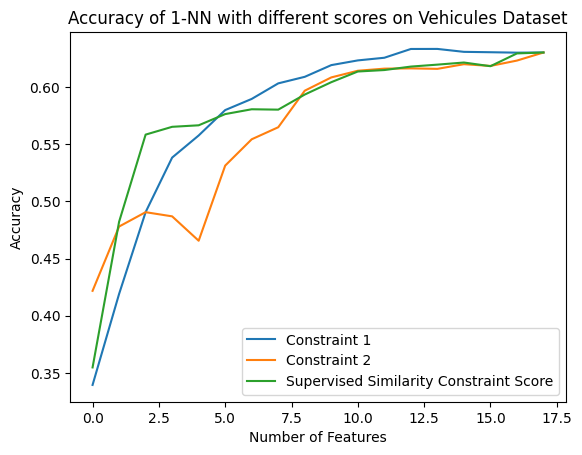

In [21]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_vehicle, X_test_vehicle,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Vehicules Dataset')

plt.legend()

In [22]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)

AUC of Constraint 1:  0.5499881516587677
AUC of Constraint 2:  0.5349157451290151
AUC of Similarity Constraint Score:  0.5520221169036333


Rep number: 100%|██████████| 100/100 [26:16<00:00, 15.76s/it]


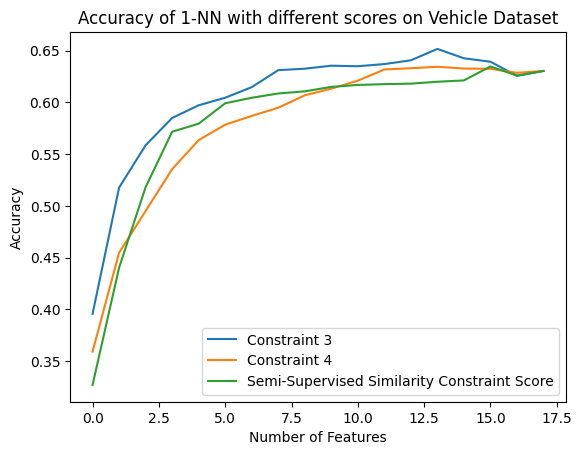

In [23]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_vehicle, X_test_vehicle,100,3)
accuracy_semi_supervised_similarity_constraint = scores_accuracy[0]
accuracy_constraint_3 = scores_accuracy[1]
accuracy_constraint_4 = scores_accuracy[2]



plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Vehicle Dataset')

plt.legend()

In [24]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)


print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)

AUC of Constraint 3:  0.5756055818852026
AUC of Constraint 4:  0.5520695102685623
AUC of Semi-Supervised Similarity Constraint Score:  0.5544312796208531


In [25]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_vehicle,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficients of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficients of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficients of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficients of Constraint 4: ', kendall_coefficients[3])

Kendall Coefficients of Constraint 1:  0.2254468524251806
Kendall Coefficients of Constraint 2:  0.9074510835913313
Kendall Coefficients of Constraint 3:  0.48390918472652217
Kendall Coefficients of Constraint 4:  0.8184218782249743


### Image Segmentation Dataset

In [26]:
image_segmentation = pd.read_csv('./sim_based_cs/data/segmentation.csv')
image_segmentation.head()
# get the features and the target in numpy format
X = image_segmentation.iloc[:, 1:].values
y = image_segmentation.iloc[:,0].values

# encode the classes to integers
le = LabelEncoder()
y = le.fit_transform(y)

data_segmentation = np.concatenate((X,y[np.newaxis].T), axis=1)

data_segmentation_reduced, _ = split_dataset(data_segmentation) # split the dataset twice to reduce size

X_train_image_seg, X_test_image_seg = split_dataset(data_segmentation_reduced)

Rep number: 100%|██████████| 100/100 [4:28:18<00:00, 160.99s/it]   


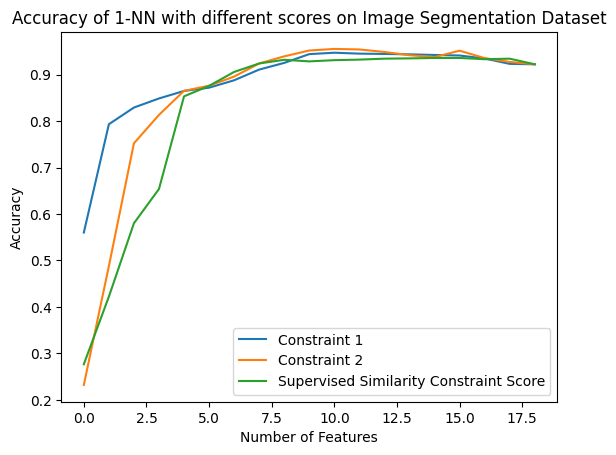

In [27]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_image_seg, X_test_image_seg,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]


plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Image Segmentation Dataset')

plt.legend()

In [28]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)

AUC of Constraint 1:  0.8495621597096189
AUC of Constraint 2:  0.8230335753176046
AUC of Similarity Constraint Score:  0.7973262250453722


Rep number: 100%|██████████| 100/100 [6:56:21<00:00, 249.81s/it] 


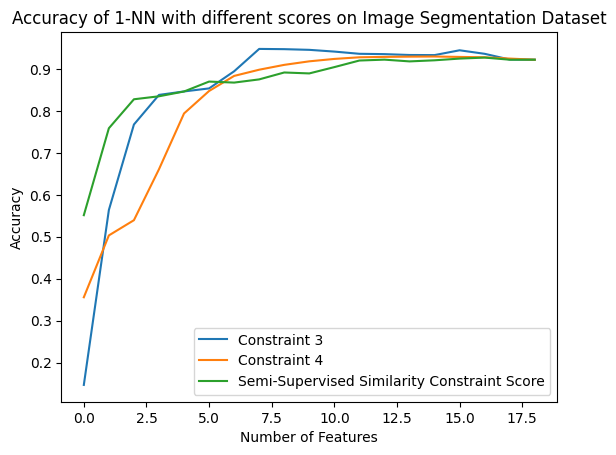

In [29]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_image_seg, X_test_image_seg,100,3)
accuracy_semi_supervised_similarity_constraint = scores_accuracy[0]
accuracy_constraint_3 = scores_accuracy[1]
accuracy_constraint_4 = scores_accuracy[2]



plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Image Segmentation Dataset')

plt.legend()

In [30]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)

print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)

AUC of Constraint 3:  0.8224627949183303
AUC of Constraint 4:  0.7904850272232302
AUC of Semi-Supervised Similarity Constraint Score:  0.8296039019963697


In [32]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_image_seg,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficient of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficient of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficient of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficient of Constraint 4: ', kendall_coefficients[3])

Kendall Coefficient of Constraint 1:  0.895911279923508
Kendall Coefficient of Constraint 2:  0.9255943473188362
Kendall Coefficient of Constraint 3:  0.9098601742120545
Kendall Coefficient of Constraint 4:  nan


### Breast Cancer Wisconsin (Diagnostic) Data Set

In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X = X.values
y = y.values
le = LabelEncoder()
y = le.fit_transform(y)

data_WBCD = np.concatenate((X,y[np.newaxis].T), axis=1)
X_train_WBCD, X_test_WBCD = split_dataset(data_WBCD)

Rep number: 100%|██████████| 100/100 [2:05:14<00:00, 75.14s/it] 


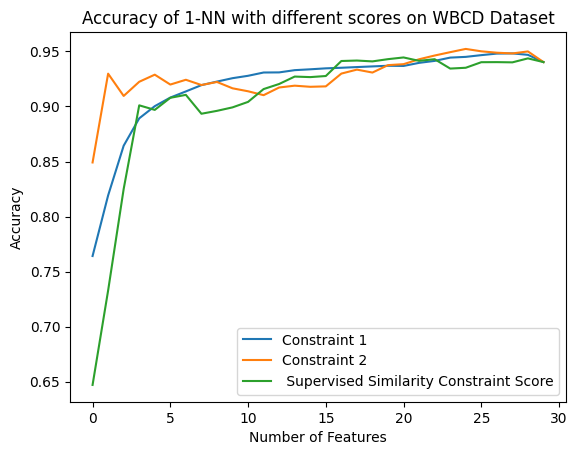

In [34]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_WBCD, X_test_WBCD,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = ' Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on WBCD Dataset')

plt.legend()

In [35]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)

AUC of Constraint 1:  0.8915947368421054
AUC of Constraint 2:  0.8980982456140355
AUC of Similarity Constraint Score:  0.8802888888888892


Rep number: 100%|██████████| 100/100 [2:49:46<00:00, 101.87s/it] 


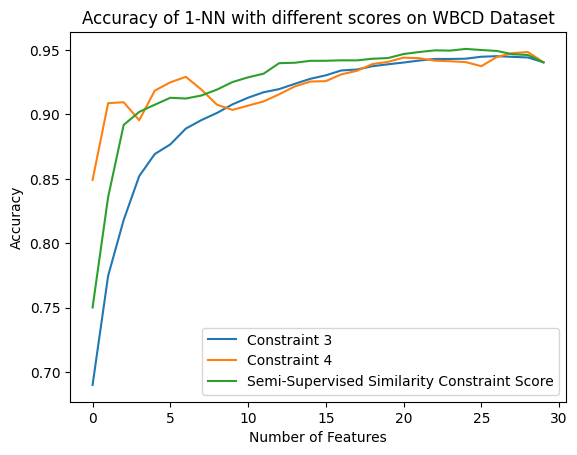

In [36]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_WBCD, X_test_WBCD,100,3)

accuracy_constraint_3 = scores_accuracy[0]
accuracy_constraint_4 = scores_accuracy[1]
accuracy_semi_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on WBCD Dataset')

plt.legend()

In [37]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)

print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)


AUC of Constraint 3:  0.8788327485380117
AUC of Constraint 4:  0.894956725146199
AUC of Semi-Supervised Similarity Constraint Score:  0.8965421052631581


In [38]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_WBCD,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficient of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficient of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficient of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficient of Constraint 4: ', kendall_coefficients[3])


Kendall Coefficient of Constraint 1:  0.3815639599555061
Kendall Coefficient of Constraint 2:  0.9467613793103449
Kendall Coefficient of Constraint 3:  0.4134969521690767
Kendall Coefficient of Constraint 4:  0.9355853170189099


### Ionosphere Dataset

In [39]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

X = X.values
y = y.values
le = LabelEncoder()
y = le.fit_transform(y)

data_ionosphere = np.concatenate((X,y[np.newaxis].T), axis=1)
X_train_ionosphere, X_test_ionosphere = split_dataset(data_ionosphere)

Rep number: 100%|██████████| 100/100 [49:57<00:00, 29.98s/it]


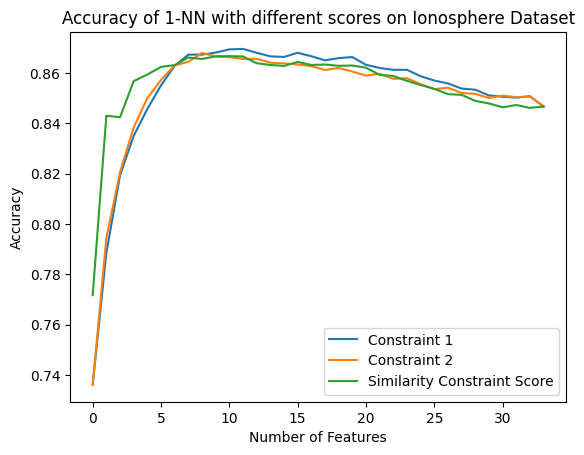

In [40]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_ionosphere, X_test_ionosphere,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]


plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Ionosphere Dataset')

plt.legend()

In [41]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)

AUC of Constraint 1:  0.8293992312834225
AUC of Constraint 2:  0.8279654077540107
AUC of Similarity Constraint Score:  0.8311163101604278


Rep number:   0%|          | 0/100 [00:00<?, ?it/s]

Rep number: 100%|██████████| 100/100 [57:06<00:00, 34.27s/it]


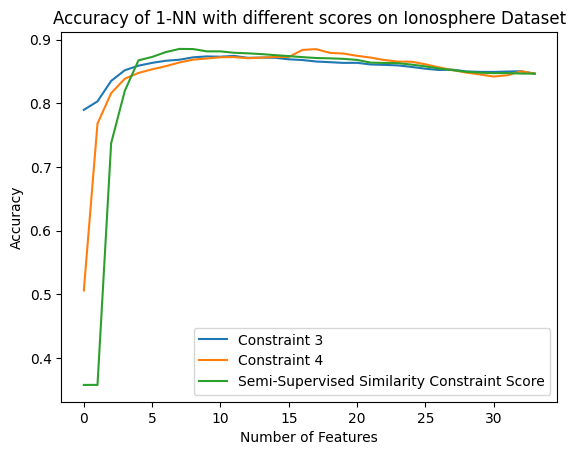

In [43]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_ionosphere, X_test_ionosphere,100,3)
accuracy_constraint_3 = scores_accuracy[0]
accuracy_constraint_4 = scores_accuracy[1]
accuracy_semi_supervised_similarity_constraint = scores_accuracy[2]


plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Ionosphere Dataset')

plt.legend()

In [44]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)


print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)

AUC of Constraint 3:  0.8327991310160429
AUC of Constraint 4:  0.8283982286096256
AUC of Semi-Supervised Similarity Constraint Score:  0.8136413770053476


In [45]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_ionosphere,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficient of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficient of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficient of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficient of Constraint 4: ', kendall_coefficients[3])

Kendall Coefficient of Constraint 1:  0.11834517699797861
Kendall Coefficient of Constraint 2:  0.11940056165354716
Kendall Coefficient of Constraint 3:  0.2373152024446142
Kendall Coefficient of Constraint 4:  0.7597730786860198


### Libras Movement

In [28]:
### Libras Movement
libras_movement = pd.read_csv('./sim_based_cs/data/libras.csv')
libras_movement.head()
# get the features and the target in numpy format
X = libras_movement.iloc[:, :-1].values
y = libras_movement.iloc[:,-1].values


data_libras = np.concatenate((X,y[np.newaxis].T), axis=1)
X_train_libras, X_test_libras = split_dataset(data_libras)

Rep number: 100%|██████████| 100/100 [13:45:12<00:00, 495.13s/it]  


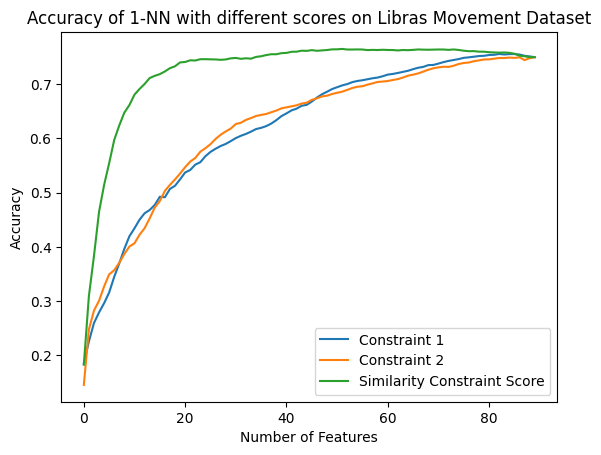

In [47]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_libras, X_test_libras,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Libras Movement Dataset')

plt.legend()

In [48]:
print('AUC of Constraint 1: ', auc_score(accuracy_constraint_1))
print('AUC of Constraint 2: ', auc_score(accuracy_constraint_2))
print('AUC of Similarity Constraint Score: ', auc_score(accuracy_supervised_similarity_constraint))



AUC of Constraint 1:  0.6146586419753086
AUC of Constraint 2:  0.615639197530864
AUC of Similarity Constraint Score:  0.7183469135802468


Rep number:   0%|          | 0/100 [00:00<?, ?it/s]

Rep number: 100%|██████████| 100/100 [12:51:51<00:00, 463.11s/it]   


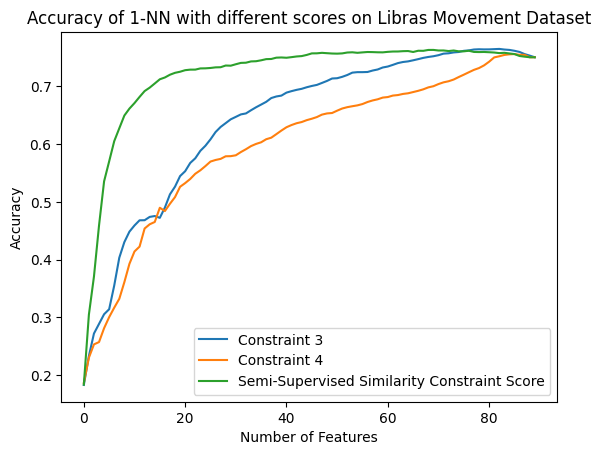

In [49]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_libras, X_test_libras,100,3)
accuracy_constraint_3 = scores_accuracy[0]
accuracy_constraint_4 = scores_accuracy[1]
accuracy_semi_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Libras Movement Dataset')

plt.legend()

In [50]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)

print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)

AUC of Constraint 3:  0.6355351851851851
AUC of Constraint 4:  0.5945006172839504
AUC of Semi-Supervised Similarity Constraint Score:  0.7130629629629629


In [51]:
scores = [constraint_score_1,constraint_score_2,constraint_score_3,constraint_score_4]
R = rank_matrix(scores,X_train_libras,100,3)
kendall_coefficients = []
for i in range(4):
    kendall_coefficients.append(kendall_coefficient(R[i]))

print('Kendall Coefficient of Constraint 1: ', kendall_coefficients[0])
print('Kendall Coefficient of Constraint 2: ', kendall_coefficients[1])
print('Kendall Coefficient of Constraint 3: ', kendall_coefficients[2])
print('Kendall Coefficient of Constraint 4: ', kendall_coefficients[3])



Kendall Coefficient of Constraint 1:  0.6428884849981479
Kendall Coefficient of Constraint 2:  0.8038140412396593
Kendall Coefficient of Constraint 3:  0.7695886405729102
Kendall Coefficient of Constraint 4:  0.7738583891015351


In [110]:
from ucimlrepo import fetch_ucirepo
le = LabelEncoder()
# fetch dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

# data (as pandas dataframes)
X = connectionist_bench_sonar_mines_vs_rocks.data.features
y = connectionist_bench_sonar_mines_vs_rocks.data.targets

X = X.values
y = y.values

y = le.fit_transform(y)

data_sonar = np.concatenate((X,y[np.newaxis].T), axis=1)
X_train_sonar, X_test_sonar = split_dataset(data_sonar)
classes, counts = np.unique(y, return_counts=True)
print(classes, counts)

[0 1] [111  97]


Rep number: 100%|██████████| 100/100 [53:14<00:00, 31.94s/it]


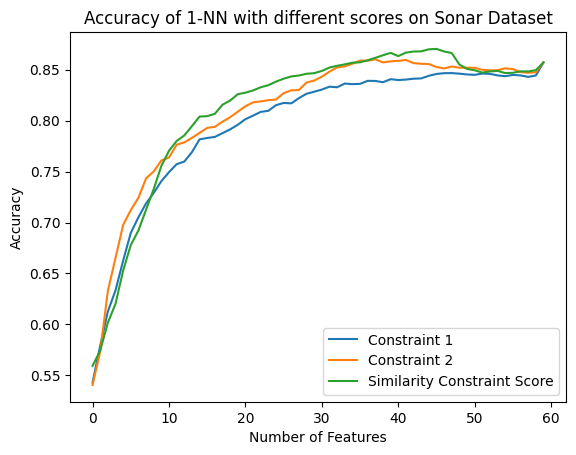

In [123]:
scores = [constraint_score_1,constraint_score_2,supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_sonar, X_test_sonar,100,3)
accuracy_constraint_1 = scores_accuracy[0]
accuracy_constraint_2 = scores_accuracy[1]
accuracy_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_1, label = 'Constraint 1')
plt.plot(accuracy_constraint_2, label = 'Constraint 2')
plt.plot(accuracy_supervised_similarity_constraint, label = 'Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Sonar Dataset')

plt.legend()

In [124]:
auc_constraint_1 = auc_score(accuracy_constraint_1)
auc_constraint_2 = auc_score(accuracy_constraint_2)
auc_similarity_constraint = auc_score(accuracy_supervised_similarity_constraint)

print('AUC of Constraint 1: ', auc_constraint_1)
print('AUC of Constraint 2: ', auc_constraint_2)
print('AUC of Similarity Constraint Score: ', auc_similarity_constraint)


AUC of Constraint 1:  0.7846825396825392
AUC of Constraint 2:  0.7973047619047614
AUC of Similarity Constraint Score:  0.7995722222222217


Rep number: 100%|██████████| 100/100 [55:47<00:00, 33.47s/it]


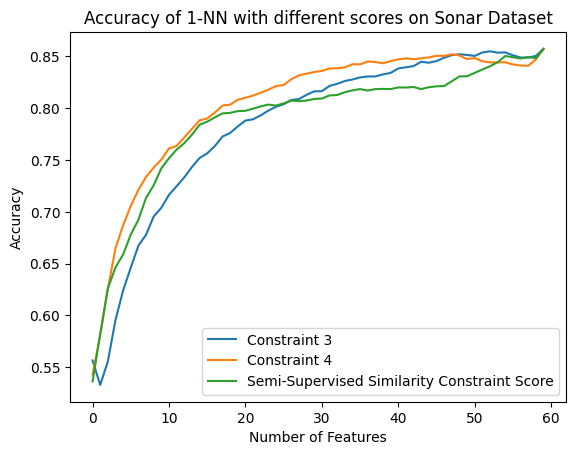

In [126]:
scores = [constraint_score_3,constraint_score_4,semi_supervised_similarity_constraint_score]
scores_accuracy = plot_accuracy(scores, X_train_sonar, X_test_sonar,100,3)
accuracy_constraint_3 = scores_accuracy[0]
accuracy_constraint_4 = scores_accuracy[1]
accuracy_semi_supervised_similarity_constraint = scores_accuracy[2]

plt.plot(accuracy_constraint_3, label = 'Constraint 3')
plt.plot(accuracy_constraint_4, label = 'Constraint 4')
plt.plot(accuracy_semi_supervised_similarity_constraint, label = 'Semi-Supervised Similarity Constraint Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN with different scores on Sonar Dataset')

plt.legend()

In [127]:
auc_constraint_3 = auc_score(accuracy_constraint_3)
auc_constraint_4 = auc_score(accuracy_constraint_4)
auc_semi_similarity_constraint = auc_score(accuracy_semi_supervised_similarity_constraint)

print('AUC of Constraint 3: ', auc_constraint_3)
print('AUC of Constraint 4: ', auc_constraint_4)
print('AUC of Semi-Supervised Similarity Constraint Score: ', auc_semi_similarity_constraint)

AUC of Constraint 3:  0.7723015873015869
AUC of Constraint 4:  0.7917476190476186
AUC of Semi-Supervised Similarity Constraint Score:  0.776494444444444


In [ ]:
rep = 100
res = np.zeros((rep, 3))
for i in range(rep):
    res[i] = np.array(correct_number_must_link(data_vehicles,'nearest prototype', 3))


In [149]:
print(res.mean(axis=0))

[0.33915337 0.37389789 0.00081145]
